# Тестовое задание №2 на позицию Data Scientist / аналитик данных
<br>

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Предоставлен набор данных, в которых содержится информация о 300 тысячах уникальных пользователей и характеристиках их заказов.

&nbsp;&nbsp;&nbsp;&nbsp;**Компания** - фешн ритейлер.

&nbsp;&nbsp;&nbsp;&nbsp;**Заказчики** - отдел маркетинга (CRM и performance). 4-5 пользователей с разной степенью погруженности.

 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача провести кластеризацию клиентов, для оценки состояния базы и:
1. Спрогнозировать "отток" и "пред-отток" пользователей, 
2. Выявить какие особенности имеются у активных клиентов, на какие группы они разделяются,
3. Определить характеристики топовых клиентов,
4. Описать полученные кластеры, в чем их особенность, выделить кластер “топовых” клиентов, объяснить его “топовость”

&nbsp;&nbsp;&nbsp;&nbsp; Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных, 
2. Исследование зависимостей и формулирование гипотез,
3. Построение модели для кластеризации на основе проверенных гипотез и выявленных взаимосвязей, 
4. Описать полученные кластеры. 
<br><br>
_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-модели-для-кластеризации)<br>
[4. Сравнение качества моделей](#4.-Описание-полученных-кластеров) <br>

## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/file/d/1BDqGgQVZCX3ZqKUbHzM1wRORBjKFrQbI/view ) 
<br><br>

`clustering_test_work.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `actual_id` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `period_end` – окончание периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `num` – порядковый номер  периода жизни клиента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `revenue_lastyear` – выручка за прошлый год<br>
&nbsp;&nbsp;&nbsp;&nbsp; `quantity_lastyear` – Количество выкупленных единиц товаров за 1 год от даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `orders_lastyear` – Количество выкупленных заказов за 1 год от даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `orders_refund` – Количество выкупленных заказов, по которым был возврат после получения за 1 год от даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `ratio_not_dh` – Отношение выкупа по стоимости от суммарной базовой стоимости выкупленных товаров за 1 год от даты окончания i-ого <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `ratio_online` – Доля заказов, оформленных онлайн, от общего числа оформленных заказов за 1 год от даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `ratio_refund` – Доля заказов, по которым был возврат, от общего числа выкупленных заказов за 1 год от даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `avg_ratio_purchase` – Среднее отношение за 1 год от даты окончания i-ого периода числа выкупленных товарных позиций к числу <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;оформленных по онлайн-заказам, доставленным к пункту выдачи<br>
&nbsp;&nbsp;&nbsp;&nbsp; `quantity_1st_period` – Количество выкупленных единиц товара за 1-ый период жизни пользователя<br>
&nbsp;&nbsp;&nbsp;&nbsp; `unigenders` – Количество уникальных гендерных характеристик принадлежности товарных позиций по оформленным заказам за все время <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;жизни пользователя от даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `recency` – Количество дней от даты последнего выкупленного заказа до даты окончания i-ого периода<br>
&nbsp;&nbsp;&nbsp;&nbsp; `aov` – Средний чек по выкупленным заказам за 1 год от даты окончания i-ого периода<br>

In [179]:
# Загрузка библиотек и модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")
# , category=FutureWarning
%matplotlib inline

# 1. Описание данных

In [180]:
### Загрузка данных ###
source_df = pd.read_csv("clustering_test_work.csv")

# Для EDA делаем копию датафрейма и с ней будем работать.
eda_df = source_df.copy()

# Убираем столбцы Unnamed: 0  и customerID.
eda_df = eda_df.drop(['Unnamed: 0'], axis=1, errors='ignore')

# Посмотрим на датасет и на типы данных по столбцам
eda_df.info()
eda_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247574 entries, 0 to 2247573
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   actual_id            int64  
 1   period_end           object 
 2   num                  int64  
 3   revenue_lastyear     float64
 4   quantity_lastyear    int64  
 5   orders_lastyear      int64  
 6   orders_refund        int64  
 7   ratio_not_dh         float64
 8   ratio_online         float64
 9   ratio_refund         float64
 10  avg_ratio_purchase   float64
 11  quantity_1st_period  float64
 12  unigenders           int64  
 13  recency              int64  
 14  aov                  float64
dtypes: float64(7), int64(7), object(1)
memory usage: 257.2+ MB


,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
2247569,998998908989,2022-05-18,9,82628.0,5,4,0,1.0,1.0,0.0,1.0,3.0,1,254,20657.00
2247570,998998908989,2022-07-18,10,87699.0,6,4,0,1.0,1.0,0.0,1.0,3.0,1,61,21924.75
2247571,998998908989,2022-09-18,11,14046.0,2,1,0,1.0,1.0,0.0,1.0,3.0,1,123,14046.00
2247572,998998908989,2022-11-18,12,14046.0,2,1,0,1.0,1.0,0.0,1.0,3.0,1,184,14046.00
2247573,998998908989,2022-12-07,13,14046.0,2,1,0,1.0,1.0,0.0,1.0,3.0,1,203,14046.00


In [181]:
print('Количество NA значений\n\n',eda_df.isna().sum(),'\n\nКоличество нулевых значений\n\n',eda_df.isnull().sum())

Количество NA значений

 actual_id              0
period_end             0
num                    0
revenue_lastyear       0
quantity_lastyear      0
orders_lastyear        0
orders_refund          0
ratio_not_dh           0
ratio_online           0
ratio_refund           0
avg_ratio_purchase     0
quantity_1st_period    0
unigenders             0
recency                0
aov                    0
dtype: int64 

Количество нулевых значений

 actual_id              0
period_end             0
num                    0
revenue_lastyear       0
quantity_lastyear      0
orders_lastyear        0
orders_refund          0
ratio_not_dh           0
ratio_online           0
ratio_refund           0
avg_ratio_purchase     0
quantity_1st_period    0
unigenders             0
recency                0
aov                    0
dtype: int64


In [182]:
# Количество уникальных пользователей
eda_df['actual_id'].nunique()

302119

In [183]:
# Посмотрим на первого клиента
eda_df[eda_df['actual_id'] == 12013601421]

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0
1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0
2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0
3,12013601421,2021-08-19,5,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,304,17920.0
4,12013601421,2021-10-19,6,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,365,17920.0
5,12013601421,2021-12-19,7,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,426,0.0
6,12013601421,2022-02-19,8,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,488,0.0
7,12013601421,2022-04-19,9,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,547,0.0
8,12013601421,2022-06-19,10,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,608,0.0
9,12013601421,2022-08-19,11,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,669,0.0


In [184]:
# Посмотрим на последнего клиента
eda_df[eda_df['actual_id'] == 998998908989]

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
2247562,998998908989,2021-03-18,2,39686.0,3,3,0,1.0,1.0,0.0,1.0,3.0,1,97,13228.666667
2247563,998998908989,2021-05-18,3,48666.0,4,4,0,1.0,1.0,0.0,1.0,3.0,1,55,12166.500000
2247564,998998908989,2021-07-18,4,57641.0,5,5,0,1.0,1.0,0.0,1.0,3.0,1,46,11528.200000
2247565,998998908989,2021-09-18,5,131294.0,9,8,0,1.0,1.0,0.0,1.0,3.0,1,12,16411.750000
2247566,998998908989,2021-11-18,6,131294.0,9,8,0,1.0,1.0,0.0,1.0,3.0,1,73,16411.750000
2247567,998998908989,2022-01-18,7,91608.0,6,5,0,1.0,1.0,0.0,1.0,3.0,1,134,18321.600000
2247568,998998908989,2022-03-18,8,91608.0,6,5,0,1.0,1.0,0.0,1.0,3.0,1,193,18321.600000
2247569,998998908989,2022-05-18,9,82628.0,5,4,0,1.0,1.0,0.0,1.0,3.0,1,254,20657.000000
2247570,998998908989,2022-07-18,10,87699.0,6,4,0,1.0,1.0,0.0,1.0,3.0,1,61,21924.750000
2247571,998998908989,2022-09-18,11,14046.0,2,1,0,1.0,1.0,0.0,1.0,3.0,1,123,14046.000000


In [185]:
# Посмотрим на последний период
eda_df[eda_df['num'] == 14].head()

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
166,12124442520,2022-12-07,14,0.0,0,0,0,0.0,0.0,0.0,1.0,10.0,1,478,0.0
347,13108973453,2022-12-07,14,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,463,0.0
389,13237944294,2022-12-07,14,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,1,815,0.0
611,14077817894,2022-12-07,14,0.0,0,0,0,0.0,0.0,0.0,1.0,6.0,2,529,0.0
631,14089819407,2022-12-07,14,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,1,385,0.0


In [186]:
# Оставляем тех клиентов, у которых есть заказы
eda_df[(eda_df['num'] == 14) & (eda_df['revenue_lastyear'] != 0)].head()

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
1072,16464042576,2022-12-07,14,69860.0,7,3,0,0.885874,1.0,0.000000,1.0,1.0,2,304,23286.666667
1175,16468949309,2022-12-07,14,11069.0,1,1,0,1.000000,1.0,0.000000,1.0,2.0,1,90,11069.000000
4585,31686298559,2022-12-07,14,7386.0,2,2,0,1.000000,1.0,0.000000,1.0,2.0,1,281,3693.000000
5237,33783221347,2022-12-07,14,137905.0,16,13,4,0.946193,0.6,0.307692,1.0,9.0,1,112,10608.076923
5377,34633351789,2022-12-07,14,23974.0,3,1,0,1.000000,1.0,0.000000,1.0,6.0,2,339,23974.000000


In [187]:
# Посмотрим на описание датасета
eda_df.describe()

,actual_id,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
count,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06,2.247574e+06
mean,2.743856e+13,6.089290e+00,3.099290e+04,3.321365e+00,2.006601e+00,1.232200e-01,7.761333e-01,2.389008e-01,3.704832e-02,9.649268e-01,2.289252e+00,1.038383e+00,2.396081e+02,1.187220e+04
std,9.871432e+15,3.164263e+00,6.037296e+04,6.016230e+00,3.069162e+00,6.905141e-01,4.014436e-01,3.838896e-01,1.554406e-01,1.458924e-01,2.412920e+00,1.921185e-01,1.791003e+02,1.202568e+04
min,6.380000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,7.912462e+10,3.000000e+00,3.980000e+03,1.000000e+00,1.000000e+00,0.000000e+00,8.341633e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,3.480000e+03
50%,7.919928e+10,6.000000e+00,1.398000e+04,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.840000e+02,9.980000e+03
75%,7.950406e+10,8.000000e+00,3.492000e+04,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.630000e+02,1.624150e+04
max,4.415340e+18,1.400000e+01,7.365842e+06,6.290000e+02,2.810000e+02,1.260000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.380000e+02,2.000000e+00,8.270000e+02,4.307900e+05


In [188]:
# Посмотрим клиентов, у которых более 100 заказов
eda_df[eda_df['orders_lastyear'] > 100].describe()

,actual_id,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
count,5.800000e+01,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,7.918718e+10,9.051724,2.445472e+06,225.844828,131.965517,32.706897,0.942168,0.730348,0.237143,0.856027,24.431034,1.724138,11.672414,18381.900420
std,1.507556e+08,3.310920,1.327039e+06,106.961512,36.817695,28.756088,0.089023,0.302893,0.172301,0.129817,21.649612,0.450851,20.918713,6864.630739
min,7.903749e+10,2.000000,8.078650e+05,115.000000,101.000000,0.000000,0.514398,0.000000,0.000000,0.489583,1.000000,1.000000,1.000000,5879.827586
25%,7.905676e+10,6.250000,1.776652e+06,172.500000,111.250000,6.000000,0.927397,0.615149,0.048605,0.805697,11.000000,1.000000,2.000000,13919.053750
50%,7.917591e+10,9.000000,2.209470e+06,198.000000,121.000000,33.500000,0.963353,0.835290,0.275820,0.888912,20.000000,2.000000,4.000000,18772.692317
75%,7.924404e+10,12.000000,2.590482e+06,224.000000,142.750000,46.000000,0.988595,0.962669,0.363684,0.962260,31.750000,2.000000,8.000000,21590.586522
max,7.982650e+10,14.000000,7.365842e+06,629.000000,281.000000,126.000000,0.997796,1.000000,0.641509,1.000000,92.000000,2.000000,93.000000,38597.344262


In [189]:
# Посмотрим клиентов с большим количеством заказов, которые делали заказ более 10 дней назад
eda_df[(eda_df['orders_lastyear'] > 100) & (eda_df['recency'] > 10)]

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
257122,79043080343,2022-12-07,14,2298574.00,179,114,26,0.984638,0.727941,0.228070,0.829121,47.0,2,14,20162.929825
275029,79050484770,2022-12-07,10,3336183.05,195,139,1,0.997771,0.989011,0.007194,0.992754,8.0,2,13,24001.316906
306996,79056756886,2022-09-30,3,852575.00,164,145,0,0.882200,0.000000,0.000000,1.000000,92.0,1,25,5879.827586
306997,79056756886,2022-11-30,4,852575.00,164,145,0,0.882200,0.000000,0.000000,1.000000,92.0,1,86,5879.827586
306998,79056756886,2022-12-07,5,852575.00,164,145,0,0.882200,0.000000,0.000000,1.000000,92.0,1,93,5879.827586
885264,79165491846,2021-11-15,7,2396640.00,220,111,38,0.987910,0.436090,0.342342,0.825581,22.0,2,34,21591.351351
885266,79165491846,2022-03-15,9,2376620.00,221,115,41,0.987810,0.468085,0.356522,0.806122,22.0,2,67,20666.260870
937164,79167252777,2021-09-02,6,1193705.00,119,113,47,0.909542,0.868750,0.415929,0.842593,25.0,2,16,10563.761062
1026111,79175906629,2022-01-02,8,1509774.00,154,104,35,0.940777,0.826446,0.336538,0.938697,34.0,2,38,14517.057692
1026117,79175906629,2022-12-07,14,7300757.00,624,276,126,0.955860,0.948387,0.456522,0.926608,34.0,2,39,26452.018116


# 2. Исследование зависимостей и формулирование гипотез

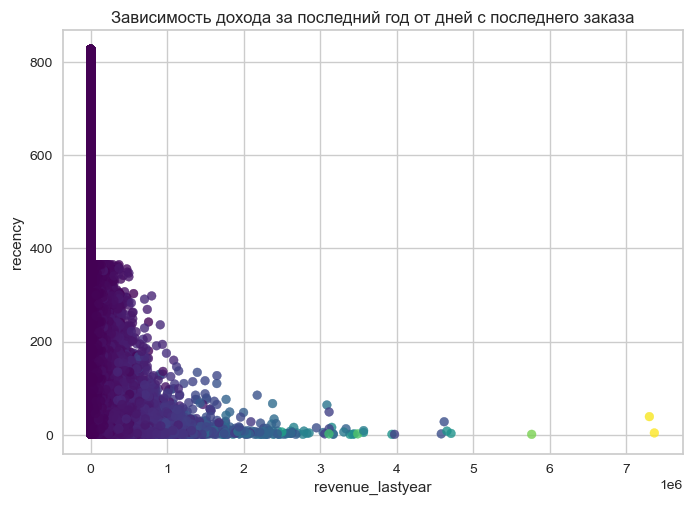

In [190]:
# Зависимость дохода за последний год от дней с последнего заказа
plt.scatter(eda_df.revenue_lastyear, eda_df.recency, s=40, c=eda_df.quantity_lastyear, marker='o', alpha=0.8, cmap='viridis')
plt.title('Зависимость дохода за последний год от дней с последнего заказа')
plt.xlabel('revenue_lastyear')
plt.ylabel('recency')
plt.show()

In [191]:
# Удаляем строки с нулевым доходом за последний год revenue_lastyear = 0 и выбросы revenue_lastyear > 4000000
eda_df = eda_df[(eda_df['revenue_lastyear'] != 0) & (eda_df['revenue_lastyear'] < 4*10**6)]

In [192]:
eda_df.drop_duplicates (subset=['actual_id', 'revenue_lastyear', 'quantity_lastyear', 'orders_lastyear'])

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.00
12,12013960666,2022-05-02,2,27960.0,2,1,0,1.0,0.0,0.0,1.0,2.0,1,120,27960.00
17,12019257700,2022-03-19,2,27900.0,5,1,0,1.0,0.0,0.0,1.0,5.0,1,120,27900.00
23,12019824362,2021-08-30,2,25461.0,1,1,0,1.0,0.0,0.0,1.0,1.0,1,122,25461.00
32,12026154577,2021-03-22,2,33920.0,4,1,0,1.0,1.0,0.0,1.0,4.0,1,120,33920.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247565,998998908989,2021-09-18,5,131294.0,9,8,0,1.0,1.0,0.0,1.0,3.0,1,12,16411.75
2247567,998998908989,2022-01-18,7,91608.0,6,5,0,1.0,1.0,0.0,1.0,3.0,1,134,18321.60
2247569,998998908989,2022-05-18,9,82628.0,5,4,0,1.0,1.0,0.0,1.0,3.0,1,254,20657.00
2247570,998998908989,2022-07-18,10,87699.0,6,4,0,1.0,1.0,0.0,1.0,3.0,1,61,21924.75


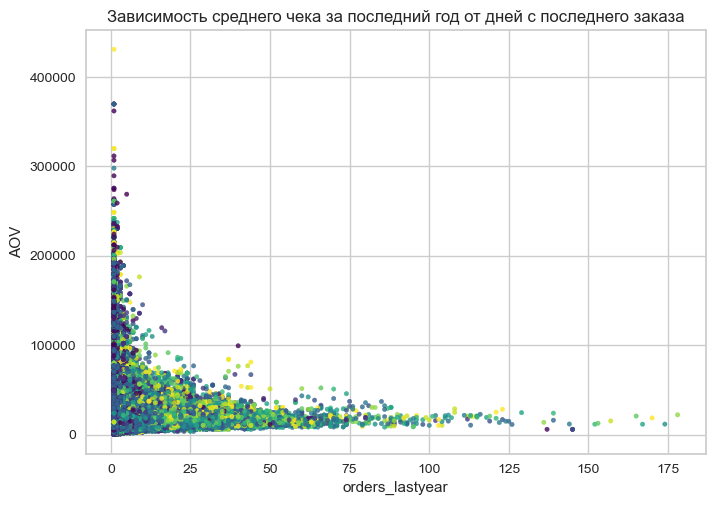

In [193]:
# Зависимость среднего чека за последний год от дней с последнего заказа
plt.scatter(eda_df.orders_lastyear, eda_df.aov, s=40, c=eda_df.num, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость среднего чека за последний год от дней с последнего заказа')
plt.xlabel('orders_lastyear')
plt.ylabel('AOV')
plt.show()

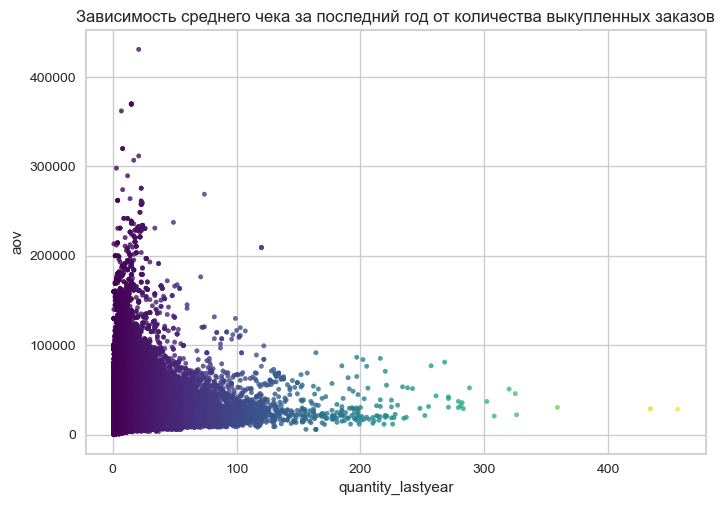

In [194]:
# Зависимость среднего чека за последний год от количества выкупленных заказов
plt.scatter(eda_df.quantity_lastyear, eda_df.aov, s=40, c=eda_df.quantity_lastyear, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость среднего чека за последний год от количества выкупленных заказов')
plt.xlabel('quantity_lastyear')
plt.ylabel('aov')
plt.show()

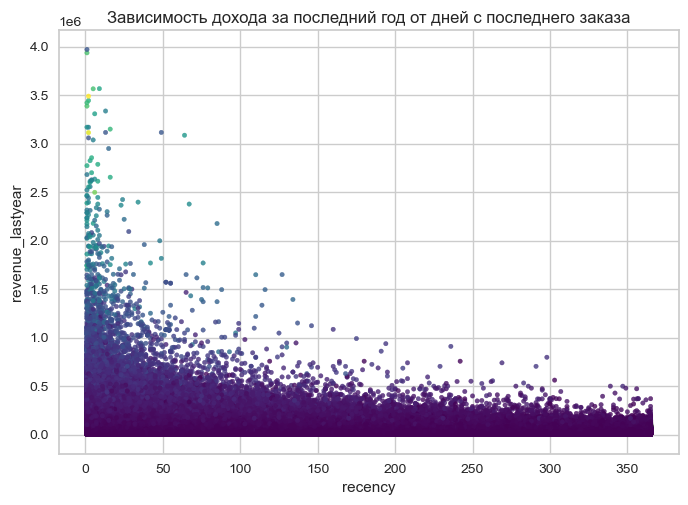

In [195]:
# Зависимость дохода за последний год от дней с последнего заказа
plt.scatter(eda_df.recency, eda_df.revenue_lastyear, s=40, c=eda_df.quantity_lastyear, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость дохода за последний год от дней с последнего заказа')
plt.xlabel('recency')
plt.ylabel('revenue_lastyear')
plt.show()

### Рассмотрим числовые данные 'aov', 'revenue_lastyear', 'recency', 'quantity_lastyear'

In [196]:
# Создаем функцию для отрисовки гистограмм и боксплотов по интересующим столбцам

def draw_histogram(df, columns):
    fig, ax = plt.subplots(1,len(columns), figsize=(15,3))
    for i, column in enumerate(columns):
        sns.histplot(df[column],kde=True, bins=20, ax=ax[i], label=column, alpha=0.1)
        
        
def draw_boxplot(df, columns):
    fig,ax = plt.subplots(1,len(columns),figsize=(15,3))
    for i, column in enumerate(columns):
        sns.boxplot(data=df[column], ax=ax[i])
        ax[i].set_xticklabels([column])
    plt.show()

In [197]:
# Столбцы для исследования

columns = ['aov','revenue_lastyear', 'recency', 'orders_lastyear']

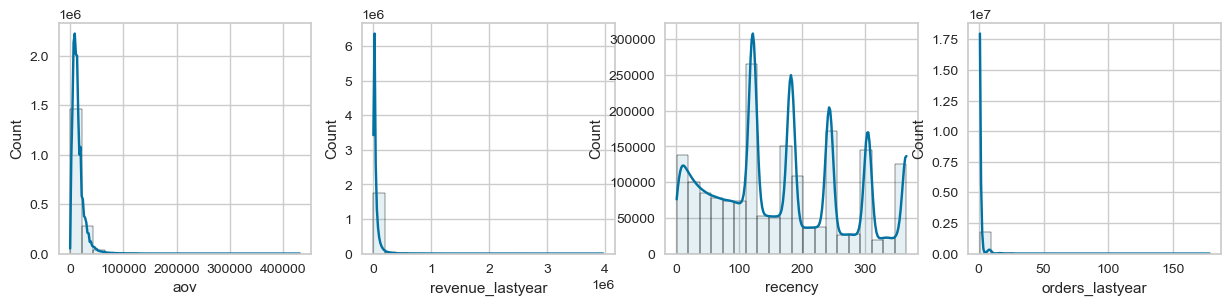

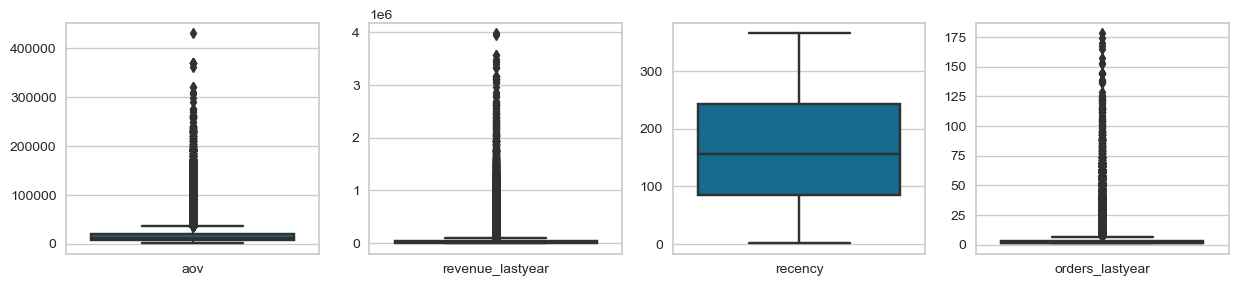

In [198]:
# Получаем гистограммы и боксплоты интересующих столбцов

draw_histogram(eda_df, columns)
draw_boxplot(eda_df, columns)

***Данные не распределены нормально. Наблюдаются выбросы***

In [224]:
# Фильтруем датасет

eda_df = eda_df[(eda_df['aov'] < 0.8 * 10 ** 5) &
               (eda_df['revenue_lastyear'] < 0.4 * 10 ** 6) ]

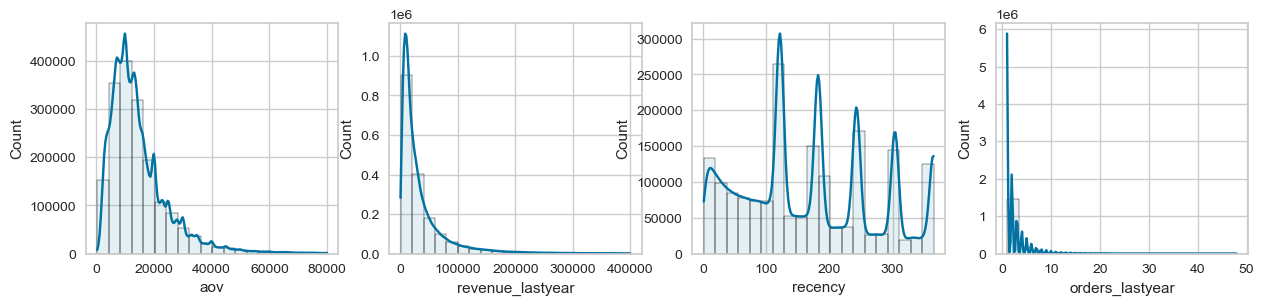

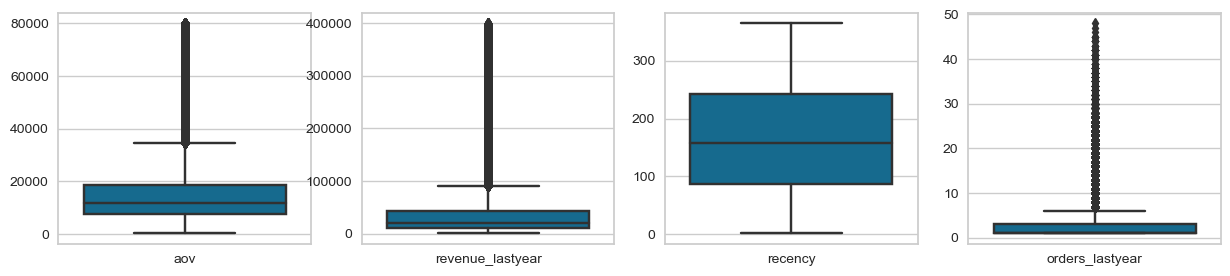

In [225]:
# Получаем гистограммы и боксплоты интересующих столбцов

draw_histogram(eda_df, columns)
draw_boxplot(eda_df, columns)

In [226]:
# Нормализуем данные с помощью MinMaxScaler
mm = MinMaxScaler() 
eda_df[['aov_n','revenue_lastyear_n', 'recency_n', 'orders_lastyear_n']] = mm.fit_transform(eda_df[['aov','revenue_lastyear', 'recency', 'orders_lastyear']])
eda_df.head(3)

,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov,aov_n,revenue_lastyear_n,recency_n,orders_lastyear_n,Clusters
0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0,0.221107,0.044086,0.335165,0.0,5
1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0,0.221107,0.044086,0.497253,0.0,0
2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0,0.221107,0.044086,0.664835,0.0,4


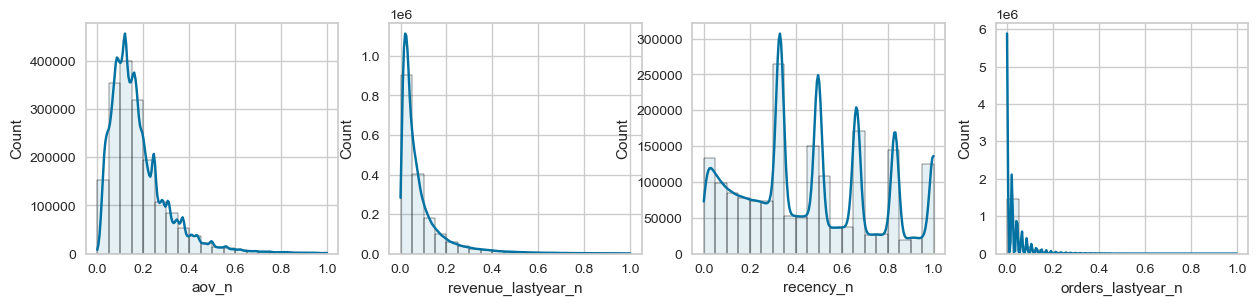

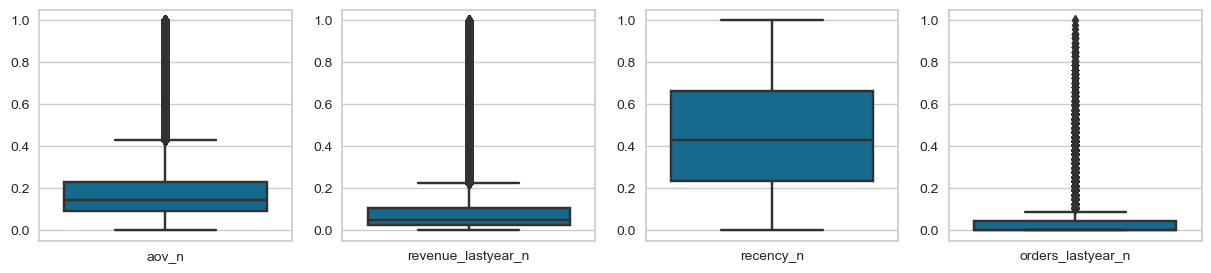

In [227]:
# Получаем гистограммы и боксплоты интересующих столбцов

columns_n = ['aov_n','revenue_lastyear_n', 'recency_n', 'orders_lastyear_n']
draw_histogram(eda_df, columns_n)
draw_boxplot(eda_df, columns_n)

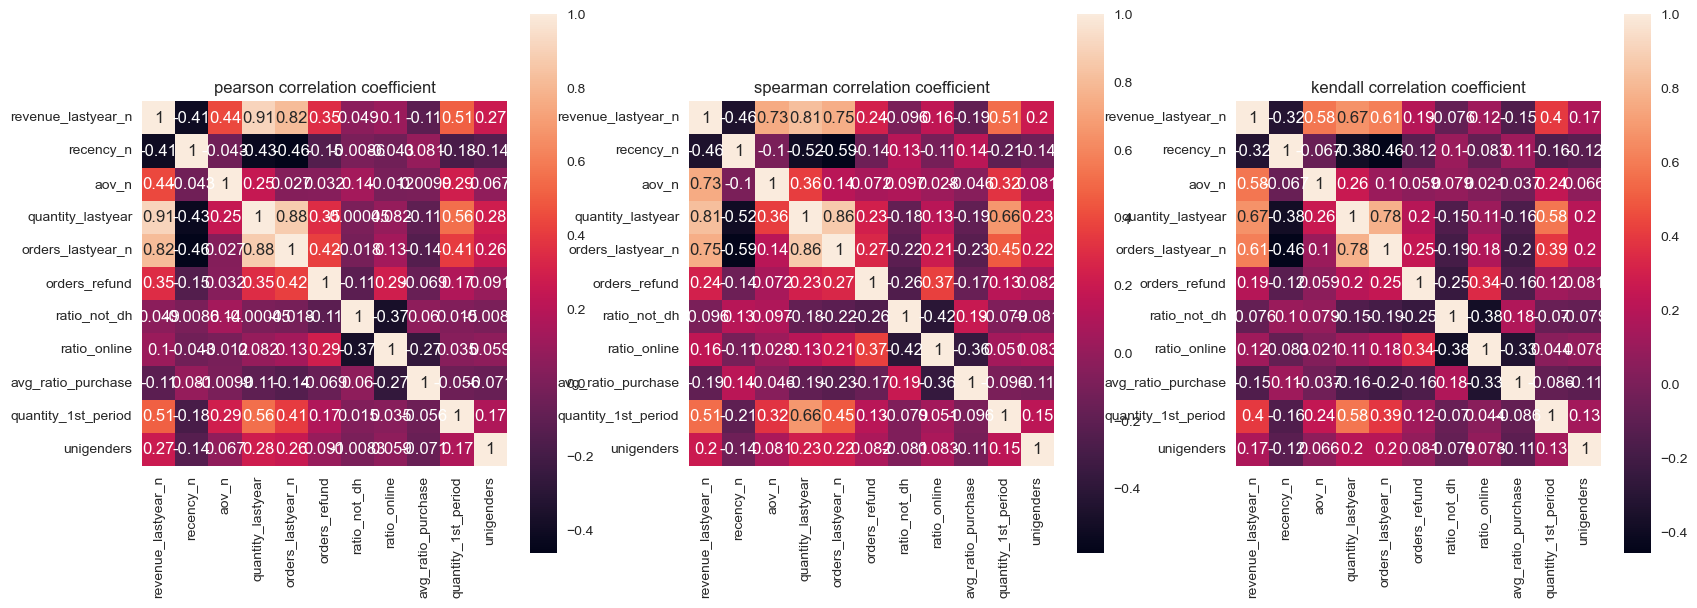

In [228]:
# Составим корреляционную матрицу
name_list = ['revenue_lastyear_n', 'recency_n', 'aov_n','quantity_lastyear', 'orders_lastyear_n', 'orders_refund', 'ratio_not_dh',
            'ratio_online', 'avg_ratio_purchase', 'quantity_1st_period', 'unigenders']
plt.figure(figsize=(20,7))
for num,name in enumerate(['pearson','spearman','kendall']):
    ax = plt.subplot(1,3,num+1)
    sns.heatmap(eda_df[name_list].corr(method=name), annot=True, square=True, ax=ax)
    plt.title(name+' correlation coefficient')

quantity_lastyear коррелирует с orders_lastyear, revenue_lastyear, aov, quantity_1st_period

ratio_not_dh коррелирует с ratio_online

avg_ratio_purchase коррелирует с ratio_online

# 3. Построение модели для кластеризации

In [229]:
X = eda_df[['aov_n', 'revenue_lastyear_n', 'recency_n', 'orders_lastyear_n']] 

Метод локтя для определения количества кластеров, которые должны быть сформированы:


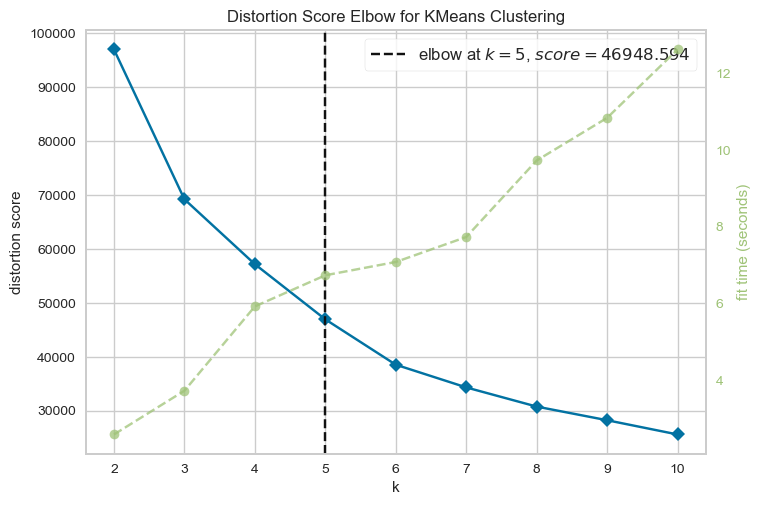

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [230]:
#метод локтя, чтобы найти количество кластеров для создания.
print('Метод локтя для определения количества кластеров, которые должны быть сформированы:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

### Построим модель для 5 кластеров

In [231]:
model = KMeans(n_clusters=5).fit(X)

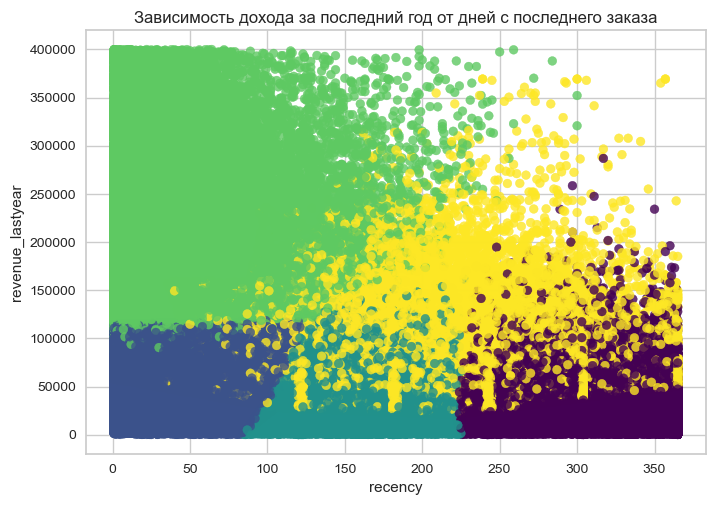

In [232]:
# Зависимость дохода за последний год от дней с последнего заказа с разбивкой на кластеры
plt.scatter(eda_df['recency'], eda_df['revenue_lastyear'], s=40, c=model.labels_, marker='o', alpha=0.8, cmap='viridis')
plt.title('Зависимость дохода за последний год от дней с последнего заказа')
plt.xlabel('recency')
plt.ylabel('revenue_lastyear')
plt.show()

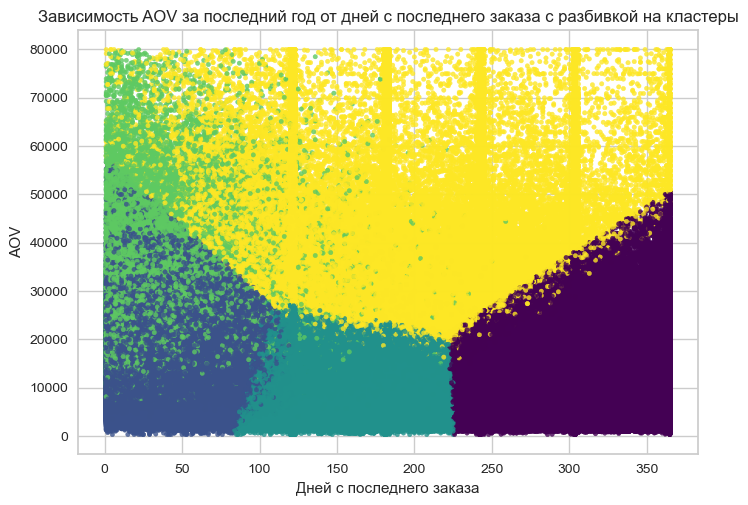

In [233]:
# Визуализируем зависимость AOV от дней с последнего заказа с разбивкой на кластеры
plt.scatter(eda_df['recency'], eda_df['aov'], s=40, c=model.labels_, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость AOV за последний год от дней с последнего заказа с разбивкой на кластеры')
plt.xlabel('Дней с последнего заказа')
plt.ylabel('AOV')
plt.show()

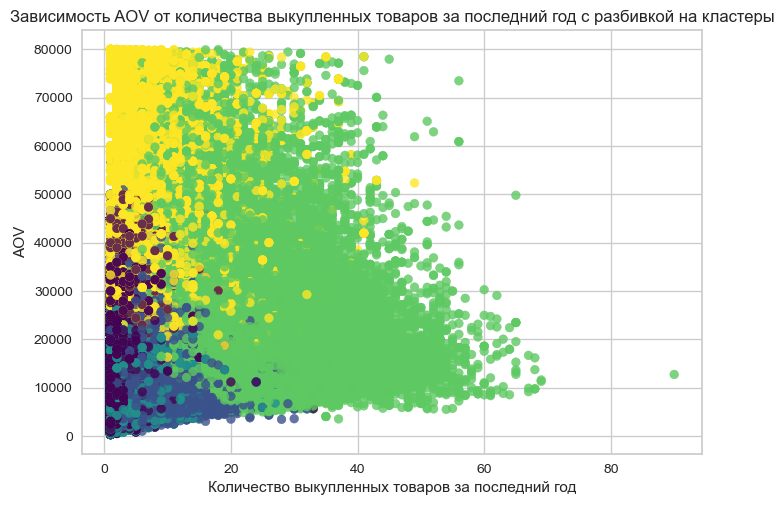

In [234]:
# Визуализируем зависимость revenue_lastyear от дней с последнего заказа с разбивкой на кластеры
plt.scatter(eda_df['quantity_lastyear'], eda_df['aov'], s=40, c=model.labels_, marker='o', alpha=0.8, cmap='viridis')
plt.title('Зависимость AOV от количества выкупленных товаров за последний год с разбивкой на кластеры')
plt.xlabel('Количество выкупленных товаров за последний год')
plt.ylabel('AOV')
plt.show()

### Построим модель для 10 кластеров

In [235]:
model = KMeans(n_clusters=10).fit(X)

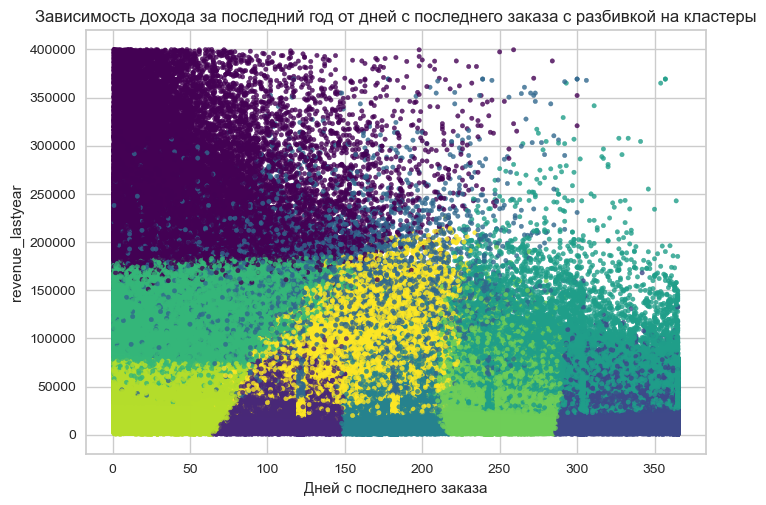

In [236]:
# Зависимость дохода за последний год от дней с последнего заказа с разбивкой на кластеры
plt.scatter(eda_df['recency'], eda_df['revenue_lastyear'], s=40, c=model.labels_, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость дохода за последний год от дней с последнего заказа с разбивкой на кластеры')
plt.xlabel('Дней с последнего заказа')
plt.ylabel('revenue_lastyear')
plt.show()

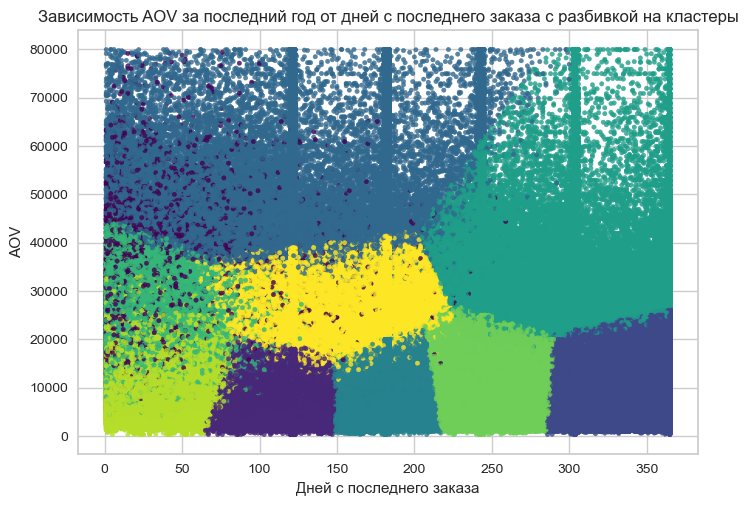

In [237]:
# Визуализируем зависимость AOV за последний год от дней с последнего заказа с разбивкой на кластеры
plt.scatter(eda_df['recency'], eda_df['aov'], s=40, c=model.labels_, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость AOV за последний год от дней с последнего заказа с разбивкой на кластеры')
plt.xlabel('Дней с последнего заказа')
plt.ylabel('AOV')
plt.show()

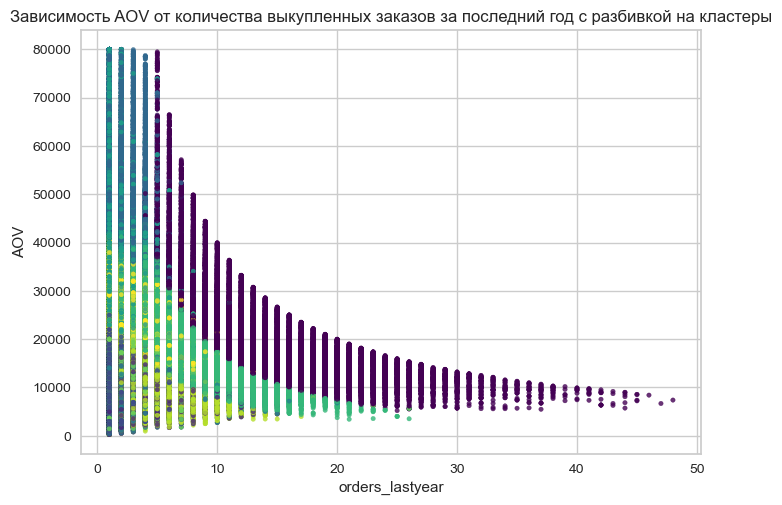

In [238]:
# Зависимость AOV от количества выкупленных заказов за последний год с разбивкой на кластеры
plt.scatter(eda_df['orders_lastyear'], eda_df['aov'], s=40, c=model.labels_, marker='.', alpha=0.8, cmap='viridis')
plt.title('Зависимость AOV от количества выкупленных заказов за последний год с разбивкой на кластеры')
plt.xlabel('orders_lastyear')
plt.ylabel('AOV')
plt.show()

# 4. Описание полученных кластеров

In [239]:
eda_df['Clusters'] = model.labels_

In [240]:
for n in range(10):
    print('Характеристики {} кластера\n\n'.format(n), 
          eda_df[(eda_df['Clusters'] == n)][['revenue_lastyear', 'orders_lastyear', 
                                             'recency', 'aov']].describe(), '\n\n')

Характеристики 0 кластера

        revenue_lastyear  orders_lastyear       recency           aov
count      39206.000000     39206.000000  39206.000000  39206.000000
mean      245890.004141        12.874203     36.141968  22215.120417
std        58364.732205         5.498322     37.114221  10028.911457
min       130274.000000         4.000000      1.000000   5210.960000
25%       198389.250000         9.000000     10.000000  14951.720497
50%       231460.000000        12.000000     23.000000  19905.905556
75%       282918.750000        16.000000     50.000000  27119.181250
max       399969.000000        48.000000    300.000000  79452.000000 


Характеристики 1 кластера

        revenue_lastyear  orders_lastyear        recency            aov
count     326088.000000    326088.000000  326088.000000  326088.000000
mean       17896.245707         1.861031     115.408006    9442.027608
std        14852.708303         1.313293      16.033480    4160.083336
min          300.000000         1.00

In [241]:
stats = eda_df[['revenue_lastyear', 'orders_lastyear', 'recency', 'aov', 'Clusters']].groupby('Clusters', as_index = False).median()
stats

,Clusters,revenue_lastyear,orders_lastyear,recency,aov
0,0,231460.0,12.0,23.0,19905.905556
1,1,12980.0,1.0,121.0,9220.000000
2,2,10370.0,1.0,322.0,9980.000000
3,3,75603.0,1.0,122.0,47540.000000
4,4,11980.0,1.0,182.0,9460.000000
5,5,34980.0,1.0,303.0,30633.333333
6,6,100300.0,6.0,35.0,18384.400000
7,7,12980.0,1.0,243.0,9980.000000
8,8,33369.0,3.0,35.0,10955.250000
9,9,36920.0,1.0,133.0,24152.400000


In [245]:
stats['Active'] = None
stats['Top'] = None
for i in range(0, 10):
    if stats.iloc[i, 3] <= 60:
        stats.iloc[i, 5] = 'Активные'
    elif 60 < stats.iloc[i, 3] <= 150:
        stats.iloc[i, 5] = 'Пред-отток'
    else :
        stats.iloc[i, 5] = 'Отток'
        
for i in range(0, 10):
    if stats.iloc[i, 4] <= 10000:
        stats.iloc[i, 6] = 'min'    
    elif 10000 < stats.iloc[i, 4] <= 20000:
        stats.iloc[i, 6] = 'medium'   
    else:
        stats.iloc[i, 6] = 'top'

      
stats

,Clusters,revenue_lastyear,orders_lastyear,recency,aov,Active,Top
0,0,231460.0,12.0,23.0,19905.905556,Активные,medium
1,1,12980.0,1.0,121.0,9220.000000,Пред-отток,min
2,2,10370.0,1.0,322.0,9980.000000,Отток,min
3,3,75603.0,1.0,122.0,47540.000000,Пред-отток,top
4,4,11980.0,1.0,182.0,9460.000000,Отток,min
5,5,34980.0,1.0,303.0,30633.333333,Отток,top
6,6,100300.0,6.0,35.0,18384.400000,Активные,medium
7,7,12980.0,1.0,243.0,9980.000000,Отток,min
8,8,33369.0,3.0,35.0,10955.250000,Активные,medium
9,9,36920.0,1.0,133.0,24152.400000,Пред-отток,top


In [243]:
print('{} клиентов находятся в предоттоке'.format(int(eda_df[(eda_df['Clusters'] == 1) | (
    eda_df['Clusters'] == 3) | (eda_df['Clusters'] == 9)].groupby(['actual_id']).agg({'num': max}).count())))

290298 клиентов находятся в предоттоке


In [244]:
print('{} клиентов находятся в оттоке'.format(int(eda_df[(eda_df['Clusters'] == 2) | (eda_df['Clusters'] == 4) | (
    eda_df['Clusters'] == 5) | (eda_df['Clusters'] == 7)].groupby(['actual_id']).agg({'num': max}).count())))

249251 клиентов находятся в оттоке


In [252]:
top_client = eda_df[(eda_df['Clusters'] == 3) | (eda_df['Clusters'] == 5) | (eda_df['Clusters'] == 9)]
top_client[['revenue_lastyear', 'orders_lastyear', 'recency', 'aov', 'Clusters']].describe()

,revenue_lastyear,orders_lastyear,recency,aov,Clusters
count,274817.000000,274817.000000,274817.000000,274817.000000,274817.000000
mean,52093.790707,1.791105,185.921679,31204.807733,6.964697
std,35072.192666,1.277987,82.167246,11883.590339,2.373725
min,16893.000000,1.000000,1.000000,8997.230769,3.000000
25%,28437.000000,1.000000,122.000000,22980.000000,5.000000
50%,39980.000000,1.000000,174.000000,27980.000000,9.000000
75%,63515.000000,2.000000,243.000000,35940.000000,9.000000
max,369260.000000,21.000000,365.000000,79990.000000,9.000000
